# <center>Stock Balancing</center> 

## Team Name : SB , NIT Tiruchirappalli
### Members : Sumant Binil, Rajiv Premnath Menon, Arya Appukkuttan

### Libraries

In [37]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt

## Importing the Datasets

We used openpyxl to read the '.xlsx' file containing the dataset we have used in this algorithm.
We displayed the first few lines to check if the data was loaded correctly into the DataFrame

In [38]:
data = pd.read_excel(r'./Input/Data.xlsx', engine = "openpyxl")
data.head(20)

,Supply Site Code,SKU,Location Code,Location Type,MinDOC (Hl),Reorder Point (Hl),MaxDOC (Hl),Closing Stock,Distributor Orders,Current CS/MIN,Current CS/ROP,Current CS/MAX,Available to Deploy,Scenario
0,PL-1505,85021,PL-1505,DEP,19218.603508,70565.619828,157453.679828,0.0,0,0.0,0.0,0.0,16372.22,4
1,PL-1505,85023,PL-1505,DEP,3228.341505,40347.904084,54904.264084,0.0,0,0.0,0.0,0.0,24081.27,3
2,PL-1505,85023,PL-1831,DEP,139.463970,532.329491,1231.769491,0.0,0,0.0,0.0,0.0,24081.27,3
3,PL-1505,85023,PL-9140,DIST,68.460000,228.200000,387.940000,0.0,0,0.0,0.0,0.0,24081.27,3
4,PL-1505,85091,PL-1505,DEP,20485.647688,784197.668049,861334.448049,0.0,0,0.0,0.0,0.0,51183.23,3
5,PL-1505,85091,PL-1716,DEP,102.360710,291.839617,626.299617,0.0,0,0.0,0.0,0.0,51183.23,3
6,PL-1505,85091,PL-1722,DEP,90.158265,243.489813,498.989813,0.0,0,0.0,0.0,0.0,51183.23,3
7,PL-1505,85091,PL-1831,DEP,642.493671,2906.694039,6553.974039,0.0,0,0.0,0.0,0.0,51183.23,3
8,PL-1505,85091,PL-9010,DIST,283.890000,1050.819812,1848.739370,0.0,0,0.0,0.0,0.0,51183.23,3
9,PL-1505,85551,PL-1505,DEP,3286.251889,112198.305963,128001.085930,0.0,0,0.0,0.0,0.0,33848.22,3


## Understanding the Data 

To get a better picture of the data and the columns.

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3728 entries, 0 to 3727
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Supply Site Code     3728 non-null   object 
 1   SKU                  3728 non-null   int64  
 2   Location Code        3728 non-null   object 
 3   Location Type        3728 non-null   object 
 4   MinDOC (Hl)          3728 non-null   float64
 5   Reorder Point (Hl)   3728 non-null   float64
 6   MaxDOC (Hl)          3728 non-null   float64
 7   Closing Stock        3728 non-null   float64
 8   Distributor Orders   3728 non-null   int64  
 9   Current CS/MIN       3440 non-null   float64
 10  Current CS/ROP       3441 non-null   float64
 11  Current CS/MAX       3441 non-null   float64
 12  Available to Deploy  3728 non-null   float64
 13  Scenario             3728 non-null   int64  
dtypes: float64(8), int64(3), object(3)
memory usage: 407.9+ KB


## Cleaning Up the Data

Here we split all the data present in the dataframe into the clean data and the 'erroneous data' named as e_data.

### clean_data 
 * This Dataframe has all the entries except the ones where the:
   1.    brewery doesn't have any quantity of the product to deploy, and
   2.    a supply site where the reorder point is zero and cant be balanced


  * The optimization will only be performed on the clean data.

### e_data 
 * e_data has all the entries where the 'reorder point' is zero but the 'available to deploy' isn't zero.
 * This dataframe is created to update the 'available to deploy' value in some special cases where the clean grid has a non-zero 'available to deploy' value after the optimization. 
 * This leads to the grid being consistent throughout the dataframe.


#### The part of the dataframe where 'available to deploy' is zero will be appended at the end since no changes need to be made

In [40]:
clean_data = data[(data['Available to Deploy'] != 0)&(data['Reorder Point (Hl)'] != 0)]
print(clean_data.shape)

e_data = data[(data['Reorder Point (Hl)'] == 0) & (data['Available to Deploy'] != 0)]
print(e_data.shape)

(1964, 14)
(359, 14)


In [41]:
clean_data.head()

,Supply Site Code,SKU,Location Code,Location Type,MinDOC (Hl),Reorder Point (Hl),MaxDOC (Hl),Closing Stock,Distributor Orders,Current CS/MIN,Current CS/ROP,Current CS/MAX,Available to Deploy,Scenario
0,PL-1505,85021,PL-1505,DEP,19218.603508,70565.619828,157453.679828,0.0,0,0.0,0.0,0.0,16372.22,4
1,PL-1505,85023,PL-1505,DEP,3228.341505,40347.904084,54904.264084,0.0,0,0.0,0.0,0.0,24081.27,3
2,PL-1505,85023,PL-1831,DEP,139.463970,532.329491,1231.769491,0.0,0,0.0,0.0,0.0,24081.27,3
3,PL-1505,85023,PL-9140,DIST,68.460000,228.200000,387.940000,0.0,0,0.0,0.0,0.0,24081.27,3
4,PL-1505,85091,PL-1505,DEP,20485.647688,784197.668049,861334.448049,0.0,0,0.0,0.0,0.0,51183.23,3


In [42]:
e_data.head()

,Supply Site Code,SKU,Location Code,Location Type,MinDOC (Hl),Reorder Point (Hl),MaxDOC (Hl),Closing Stock,Distributor Orders,Current CS/MIN,Current CS/ROP,Current CS/MAX,Available to Deploy,Scenario
195,PL-1505,86631,PL-1609,DEP,0.0,0.0,0.0,68.59,0,inf,inf,inf,1149.35,4
196,PL-1505,86631,PL-1722,DEP,0.0,0.0,0.0,0.00,0,NaN,NaN,NaN,1149.35,4
197,PL-1505,86631,PL-1723,DEP,0.0,0.0,0.0,59.55,0,inf,inf,inf,1149.35,4
198,PL-1505,86631,PL-1926,DEP,0.0,0.0,0.0,5.00,0,inf,inf,inf,1149.35,4
199,PL-1505,86631,PL-1944,DEP,0.0,0.0,0.0,0.00,0,NaN,NaN,NaN,1149.35,4


# Optimization Algorithm 



### Balance Function:

* For a product grid at a brewery {
  * Repeat until available stocks is depleted or all depots reach their max capacity {
    1. Check for Depots with the current lowest CS/ROP ratio.
    2. Calculate amount of stock to be supplied in order to increase this value for all these depots to the next highest value in the grid. 
    3. If the total of these amounts is available to deploy, then make the increment; else distribute the available stock among these depots in proportion to their respective ROP’s.
    4. Check if supplying any of these distributors leads to them being supplied more than their order. If so, change the amount to the value required for them to reach their limits and not consider these distributors in future iterations.
          
   }	
       
  }

In [43]:
def balance(avbl_to_dply, grid):
    
    #the grid contains all the sites present
    
    #holds all the sites with the minimum CS/ROP in the grid, and are sequentially increased here to the next minimum value
    new_grid = pd.DataFrame(columns = grid.columns)
    
    #holds all the entries where the distributor has already recieved their full order
    dist_max = pd.DataFrame(columns = grid.columns)
    
    
    while avbl_to_dply>0: #leaves the loop once there is no more available to deploy
        
        min_ratio = grid['Current CS/ROP'].min() #the current lowest CS/ROP value in the grid
        
        #extract these sites with the min_ratio and add them to the new_grid
        new_grid = new_grid.append(grid[(grid['Current CS/ROP']== min_ratio)])
        
        grid = grid[(grid['Current CS/ROP']!= min_ratio)]#remove the sites with the min_ratio from the grid
        
        next_min = grid['Current CS/ROP'].min() #the next lowest CS/ROP value in the remaining grid
        
        sum_ROP = new_grid['Reorder Point (Hl)'].sum()#the sum of all the reorder points in the new_grid
        sum_step = (next_min-min_ratio)*(sum_ROP)#the value required to boost all the sites in the new_grid to the next_min CS/ROP value 
        
        
        if avbl_to_dply>=sum_step: #if enough quantity is available to make the update 
            avbl_to_dply-= sum_step #reduce the available to deploy
            new_grid['Current CS/ROP'] = next_min #update the new_grid to their new_min value
        else:
            new_grid['Current CS/ROP'] = new_grid['Current CS/ROP']+ (avbl_to_dply/sum_ROP) #if not possible then divide the remaining according to their total rop
            avbl_to_dply = 0 
            
        # dist_temp holds the list of distributors that have fulfilled their order or recieved more    
        dist_temp = new_grid[(new_grid['Current CS/ROP']*new_grid['Reorder Point (Hl)']>=(new_grid['Closing Stock']+ new_grid['Distributor Orders']))&(new_grid['Location Type']== 'DIST')]
        # remove these distributors from the new_grid
        new_grid = new_grid[(new_grid['Current CS/ROP']*new_grid['Reorder Point (Hl)']<(new_grid['Closing Stock']+ new_grid['Distributor Orders']))|(new_grid['Location Type']== 'DEP')]
        # add the excess deployed back to the avbl_to_dply
        avbl_to_dply += (dist_temp['Current CS/ROP']*dist_temp['Reorder Point (Hl)']-(dist_temp['Closing Stock']+ dist_temp['Distributor Orders'])).sum()
        # change back the CS/ROP value accordingly
        dist_temp['Current CS/ROP']  = (dist_temp['Closing Stock']+ dist_temp['Distributor Orders'])/dist_temp['Reorder Point (Hl)']
        dist_max = dist_max.append(dist_temp)# add it to the dist_max
        
        
    dist_max['Distributor Orders'] = 0 #update the order value of those that recieved it 
    
    # new_dist contains the distributors that recieved less than their full order
    new_dist = pd.DataFrame(new_grid[new_grid['Location Type']=='DIST'])
    new_grid = new_grid[new_grid['Location Type']=='DEP'] #remove it from the new_grid
    
    # update these distributor's orders to the new value by subtracting the supplied stock from the distributor order
    new_dist['Distributor Orders'] -= (new_dist['Current CS/ROP']*new_dist['Reorder Point (Hl)'] - new_dist['Closing Stock'])
        
    new_grid = new_dist.append(dist_max.append(new_grid)) # combine all the grids from above back into one 
    new_grid['Closing Stock'] = new_grid['Current CS/ROP']*new_grid['Reorder Point (Hl)'] #update the Closing stock for all sites with the new CS/ROP
    
    new_grid = new_grid.append(grid)
    new_grid['Available to Deploy'] = 0 #update the available to deploy for all sites to zero
    return new_grid


### Scenario 1 Function:


In [44]:
def scen1(avbl_to_dply, grid):
    
    #Divides the grid into Hub, Depots and Distributors
    hub = pd.DataFrame(grid[grid['Supply Site Code']== grid['Location Code']])
    depots = pd.DataFrame(grid[(grid['Supply Site Code']!= grid['Location Code'])&(grid['Location Type']=='DEP')])
    dists = pd.DataFrame(grid[grid['Location Type']=='DIST'])
    
    sum_dist = dists['Distributor Orders'].sum() #the total value of stocks to be deployed to all Distributors
    dists['Closing Stock'] = dists['Closing Stock']+ dists['Distributor Orders']#Gives the Distributors their Full Order
    #Update the related Distributor values
    dists['Distributor Orders'] = 0
    dists['Current CS/ROP'] = dists['Closing Stock']/dists['Reorder Point (Hl)']
    
    sum_depot = depots['Closing Stock'].sum() #the current total Closing Stock
    depots['Closing Stock'] = depots[['Closing Stock','MaxDOC (Hl)']].apply(np.max,axis =1) #the new closing stock after supplying to those depots below max capacity
    sum_depot = depots['Closing Stock'].sum() - sum_depot #the total value of stocks to be deployed to all Depots
    #Update the related Depot values
    depots['Current CS/ROP'] = depots['Closing Stock']/depots['Reorder Point (Hl)']
    
    if hub.empty:#either implies hub doesnt exist or has a zero Reorder Point
        new_grid = pd.DataFrame(dists.append(depots))
        new_grid['Available to Deploy'] = avbl_to_dply - (sum_dist+sum_depot) #save the remaining stock as available to deploy for the grid
    
    else:
        #leave remaining back in the hub and update all related values
        hub['Closing Stock'] = hub['Closing Stock']+ avbl_to_dply - (sum_dist+sum_depot)
        hub['Current CS/ROP'] = hub['Closing Stock']/hub['Reorder Point (Hl)']
        new_grid = pd.DataFrame(hub.append(dists.append(depots)))
        new_grid['Available to Deploy'] = 0 #update the available stock to 0 for the whole grid
    
    return(new_grid)

### Scenario 2 Function:

In [45]:
def scen2(avbl_to_dply, grid):
    #divide into Depots (incl. Hub) and Distributors
    depots = pd.DataFrame(grid[grid['Location Type']=='DEP'])
    dists = pd.DataFrame(grid[grid['Location Type']=='DIST'])
    
    sum_dist = dists['Distributor Orders'].sum() #the total value of stocks to be deployed to all Distributors
    dists['Closing Stock'] = dists['Closing Stock']+ dists['Distributor Orders'] #Gives the Distributors their Full Order
    #Update the related Distributor values
    dists['Distributor Orders'] = 0
    dists['Current CS/ROP'] = dists['Closing Stock']/dists['Reorder Point (Hl)']
    
    avbl_to_dply -= sum_dist #subtract the value of stocks given to distributors from the available stock
    
    depots = balance(avbl_to_dply, depots) # call the balance function on the depots with the new available stock
    dists = dists.append(depots) #combine the two dataframes
    dists['Available to Deploy'] = 0 #update the available stock to 0 for the whole grid
    
    return (dists)

### Scenario 3 Function:

In [46]:
def scen3(avbl_to_dply, grid):
    #Divides the grid into Hub, Distributors without an order and the rest of the sites
    hub = pd.DataFrame(grid[grid['Location Code']==grid['Supply Site Code']])
    dist_zero = pd.DataFrame(grid[(grid['Location Type']=='DIST')&(grid['Distributor Orders']==0)])
    grid = grid[((grid['Location Type']=='DEP')|(grid['Distributor Orders']!=0))&(grid['Location Code']!=grid['Supply Site Code'])]
    
    #first give the hub its min capacity if it exists
    if not hub.empty:
        hub_min = list(hub['MinDOC (Hl)'])[0] #retrieve the min capacity of the hub
        hub_cs  = list(hub['Closing Stock'])[0] #retrieve the closing stock of the hub
        if hub_min > hub_cs: #if the min is more than the closing stock
            
            if avbl_to_dply >= (hub_min - hub_cs): #if the amount required is available
                avbl_to_dply -= (hub_min - hub_cs) #remove what is required from the available stock
                #Update the related Hub values
                hub['Closing Stock'] = hub_min
                hub['Current CS/ROP'] = hub['Closing Stock']/hub['Reorder Point (Hl)']
                
            else:
                hub['Closing Stock'] += avbl_to_dply #adds whatever is available to the closing stock 
                avbl_to_dply = 0 
                #Update the related Hub values
                hub['Current CS/ROP'] = hub['Closing Stock']/hub['Reorder Point (Hl)']
            
    new_grid = balance(avbl_to_dply, grid) #call the balance function on the sites in the grid with the new available stock
    
    new_grid = hub.append(dist_zero.append(new_grid)) #combine all the dataframes
    new_grid['Available to Deploy'] = 0 #update the available stock to 0 for the whole grid
    return (new_grid)

### Scenario 4 Function:

In [47]:
def scen4(avbl_to_dply, grid):
    #Divides the grid into Distributors without an order and the rest of the sites (incl. Hub)
    dist_zero = pd.DataFrame(grid[(grid['Location Type']=='DIST')&(grid['Distributor Orders']==0)])
    grid = grid[(grid['Location Type']=='DEP')|(grid['Distributor Orders']!=0)]
    
    
    new_grid = balance(avbl_to_dply, grid) #call the balance function on the sites in the grid
    
    new_grid = dist_zero.append(new_grid) #combine all the dataframes
    new_grid['Available to Deploy'] = 0 #update the available stock to 0 for the whole grid
    return (new_grid)

### Main Function Call:

* For each Brewery in the list of Breweries {
 * For each Product in that Brewery {
   1. Create a product grid
   2. Retrieve the avaiable to deploy value
   3. According to the Scenario of the given grid, call the respective function that applies the business rules and returns the new grid
   4. Make respective changes in d_data
   5. Add the new grid to the Final Dataframe
   
    }
     
 }


In [48]:
new_data = pd.DataFrame(columns = clean_data.columns) #create the final clean dataframe to hold all the updated grids
new_e_data = pd.DataFrame(columns = e_data.columns) #create the final erroneous dataframe to make changes according to the clean grid
breweries = clean_data['Supply Site Code'].unique() # list of breweries present
var_df = pd.DataFrame(columns = ['Supply Site Code','SKU','Location Type','Coefficient of Variation of Current CS/ROP', 'Coefficient of Variation of New CS/ROP'])
count = 0
for site in breweries: #loop through each site in the list
    brewery = clean_data[clean_data['Supply Site Code']==site] # dataframe with all the entries having this site as the supplier
    e_brew = e_data[e_data['Supply Site Code']==site] # dataframe with all the erroneous entries having this site as the supplier
    products = brewery['SKU'].unique() # list of products present in this brewery
    for product in products:
        grid = brewery[(brewery['SKU']==product)] #clean grid for this product
        avbl_to_dply = grid['Available to Deploy'].mean() #get the 'available to deploy' value of this grid
        scenario = grid['Scenario'].mean() #get the scenario of this grid
        
        e_grid = pd.DataFrame(e_brew[e_brew['SKU']==product]) #erroneous grid for this product 
        
        # find the required scenario and call the respective function
        if scenario == 1:
            new_grid = scen1(avbl_to_dply, grid)
            
        elif scenario == 2:
            new_grid = scen2(avbl_to_dply, grid)
            
        elif scenario == 3:
            new_grid = scen3(avbl_to_dply, grid)
            
        elif scenario == 4:
            new_grid = scen4(avbl_to_dply, grid)
        
        e_grid['Available to Deploy'] =  new_grid['Available to Deploy'].mean() #change the available to deploy in the erroneous grid to keep it consistent
        
        #depots= grid[grid['Location Type' == 'DEP']]
        #depots['Current CS/ROP'].var()
        
        #calculate the mean of the two grids before and after the algorithm was run
        old_mean = grid['Current CS/ROP'].loc[grid['Location Type'] == 'DEP'].mean()
        new_mean = new_grid['Current CS/ROP'].loc[new_grid['Location Type'] == 'DEP'].mean()
        
        #calculate the coefficient of variation of the two grids before and after the algorithm was run
        old_coeff = np.inf if old_mean == 0 else grid['Current CS/ROP'].loc[grid['Location Type'] == 'DEP'].std()/old_mean
        new_coeff = np.inf if new_mean == 0 else new_grid['Current CS/ROP'].loc[new_grid['Location Type'] == 'DEP'].std()/new_mean
        
        var_df.loc[count] = [site, product, scenario, old_coeff, new_coeff]
  
        count +=1
        new_data = new_data.append(new_grid) # append the clean grid to its respective dataframe
        new_e_data = new_e_data.append(e_grid) # append the erroneous grid to its respective dataframe

# Organizing all the dataframes created

Checking the distributor order after balancing


In [49]:
new_data['Current CS/MIN'] = new_data['Closing Stock']/new_data['MinDOC (Hl)']
new_data['Current CS/MAX'] = new_data['Closing Stock']/new_data['MaxDOC (Hl)']

new_data = new_data.append(new_e_data.append(data[data['Available to Deploy'] == 0]))
new_data = new_data.sort_index()

new_data.head(50)


,Supply Site Code,SKU,Location Code,Location Type,MinDOC (Hl),Reorder Point (Hl),MaxDOC (Hl),Closing Stock,Distributor Orders,Current CS/MIN,Current CS/ROP,Current CS/MAX,Available to Deploy,Scenario
0,PL-1505,85021,PL-1505,DEP,19218.603508,70565.619828,157453.679828,16372.2,0,0.851894,0.232014,0.103981,0,4
1,PL-1505,85023,PL-1505,DEP,3228.341505,40347.904084,54904.264084,3228.34,0,1,0.0800126,0.0587995,0,3
2,PL-1505,85023,PL-1831,DEP,139.463970,532.329491,1231.769491,4533.28,0,32.505,8.51593,3.6803,0,3
3,PL-1505,85023,PL-9140,DIST,68.460000,228.200000,387.940000,0,0,0,0,0,0,3
4,PL-1505,85091,PL-1505,DEP,20485.647688,784197.668049,861334.448049,20485.6,0,1,0.0261231,0.0237836,0,3
5,PL-1505,85091,PL-1716,DEP,102.360710,291.839617,626.299617,554.825,0,5.42029,1.90113,0.885878,0,3
6,PL-1505,85091,PL-1722,DEP,90.158265,243.489813,498.989813,462.906,0,5.13437,1.90113,0.927686,0,3
7,PL-1505,85091,PL-1831,DEP,642.493671,2906.694039,6553.974039,5526,0,8.60087,1.90113,0.843153,0,3
8,PL-1505,85091,PL-9010,DIST,283.890000,1050.819812,1848.739370,0,0,0,0,0,0,3
9,PL-1505,85551,PL-1505,DEP,3286.251889,112198.305963,128001.085930,3286.25,0,1,0.0292897,0.0256736,0,3


In [50]:
print(var_df.shape)
var_df = var_df.sort_values(by = ['Supply Site Code', 'SKU'])
var_df.head(50)

(95, 5)


,Supply Site Code,SKU,Location Type,Coefficient of Variation of Current CS/ROP,Coefficient of Variation of New CS/ROP
0,PL-1505,85021,4.0,inf,NaN
1,PL-1505,85023,3.0,0.731530,0.347700
2,PL-1505,85091,3.0,0.883452,0.639480
3,PL-1505,85551,3.0,2.794198,2.086963
13,PL-1505,86631,4.0,0.876106,0.873019
14,PL-1505,86632,4.0,1.615844,1.602568
4,PL-1505,87116,3.0,1.070396,0.926117
5,PL-1505,87662,3.0,1.074380,0.547927
6,PL-1505,88512,3.0,0.906367,0.411973
7,PL-1505,88840,3.0,1.006003,0.709492


In [51]:
amount_to_deploy = pd.DataFrame(data[['Supply Site Code', 'SKU', 'Location Code', 'Location Type', 'Closing Stock',
                                      'Distributor Orders', 'Current CS/ROP', 'Scenario']])

amount_to_deploy['Amount to Deploy'] = new_data['Closing Stock'] - data['Closing Stock']
amount_to_deploy[['New Closing Stock','New CS/ROP']] = new_data[['Closing Stock','Current CS/ROP']]
amount_to_deploy.head(60)


,Supply Site Code,SKU,Location Code,Location Type,Closing Stock,Distributor Orders,Current CS/ROP,Scenario,Amount to Deploy,New Closing Stock,New CS/ROP
0,PL-1505,85021,PL-1505,DEP,0.0,0,0.0,4,16372.2,16372.2,0.232014
1,PL-1505,85023,PL-1505,DEP,0.0,0,0.0,3,3228.34,3228.34,0.0800126
2,PL-1505,85023,PL-1831,DEP,0.0,0,0.0,3,4533.28,4533.28,8.51593
3,PL-1505,85023,PL-9140,DIST,0.0,0,0.0,3,0,0,0
4,PL-1505,85091,PL-1505,DEP,0.0,0,0.0,3,20485.6,20485.6,0.0261231
5,PL-1505,85091,PL-1716,DEP,0.0,0,0.0,3,554.825,554.825,1.90113
6,PL-1505,85091,PL-1722,DEP,0.0,0,0.0,3,462.906,462.906,1.90113
7,PL-1505,85091,PL-1831,DEP,0.0,0,0.0,3,5526,5526,1.90113
8,PL-1505,85091,PL-9010,DIST,0.0,0,0.0,3,0,0,0
9,PL-1505,85551,PL-1505,DEP,0.0,0,0.0,3,3286.25,3286.25,0.0292897


# Data Visualization 


In this section we try to show you how well our algorithm was able to reduce the number of understocked sites and balance the grids based on their CS/ROP ratio

In [52]:
'The proportion of Unstocked Sites Before and After running the Algorithm'

labels = ['Understocked', 'Stocked above reorder point']
sizes_new = [new_data['Current CS/ROP'].loc[(new_data['Current CS/ROP'] < 1)&(new_data['Scenario'] != 0)&(new_data['Reorder Point (Hl)'] != 0)].count(),new_data['Current CS/ROP'].loc[(new_data['Current CS/ROP'] >= 1)&(new_data['Scenario'] != 0)&(new_data['Reorder Point (Hl)'] != 0)].count()]
sizes_old = [data['Current CS/ROP'].loc[(data['Current CS/ROP'] < 1)&(data['Scenario'] != 0)&(data['Reorder Point (Hl)'] != 0)].count(),data['Current CS/ROP'].loc[(data['Current CS/ROP'] >= 1)&(data['Scenario'] != 0)&(data['Reorder Point (Hl)'] != 0)].count()]


fig = plt.figure(figsize=(18,10), dpi=1600)

ax1 = plt.subplot2grid((1,2),(0,0))
plt.pie(sizes_old, labels=labels, autopct='%1.1f%%', colors = ['maroon','black'], textprops={'color':"black"})

ax1 = plt.subplot2grid((1,2), (0, 1))
plt.pie(sizes_new, labels=labels, autopct='%1.1f%%', colors = ['maroon','black'], textprops={'color':"black"})

plt.show()

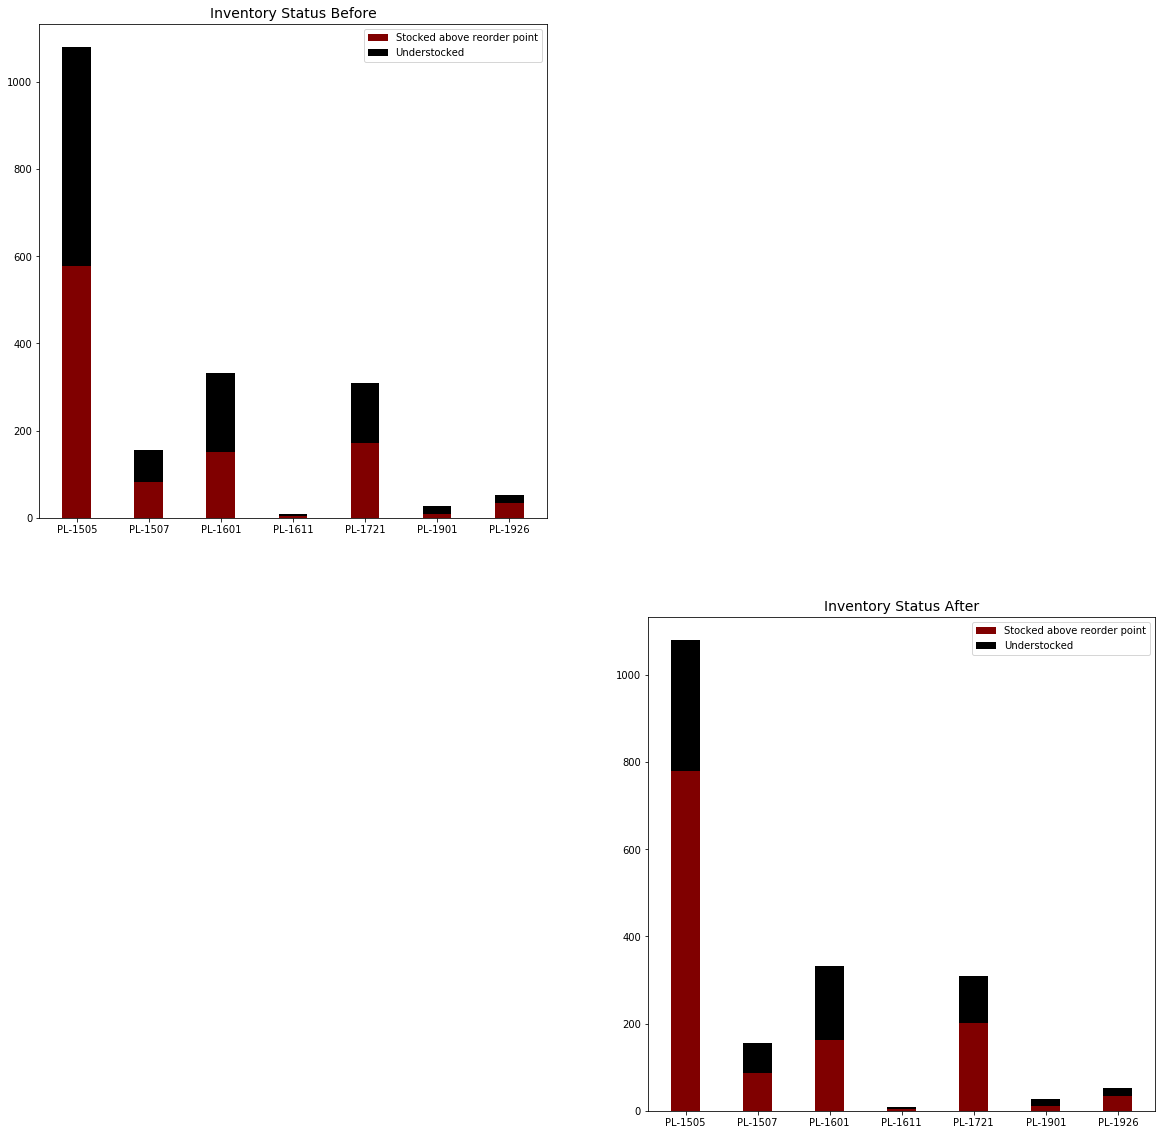

In [53]:
c_data = data[(data['Scenario'] != 0)&(data['Reorder Point (Hl)'] != 0)]
c_new = new_data[(new_data['Scenario'] != 0)&(new_data['Reorder Point (Hl)'] != 0)]
no_o = list([])
yes_o = list([])
no_n = list([])
yes_n = list([])
for site in breweries:
    no_o.append(c_data['Current CS/ROP'].loc[(c_data['Current CS/ROP'] < 1)& (c_data['Supply Site Code']==site)].count())
    yes_o.append(c_data['Current CS/ROP'].loc[(c_data['Current CS/ROP'] >= 1)& (c_data['Supply Site Code']==site)].count())
    yes_n.append(c_new['Current CS/ROP'].loc[(c_new['Current CS/ROP'] >= 1)& (c_new['Supply Site Code']==site)].count())
    no_n.append(c_new['Current CS/ROP'].loc[(c_new['Current CS/ROP'] < 1)& (c_new['Supply Site Code']==site)].count())

#print(no_o)
#print(yes_o)
#print(no_n)
#print(yes_n)
plt.figure(figsize = [20,20])
plt.subplot(2,2,1)
plt.title('Inventory Status Before', fontsize =14)
plt.bar(breweries,yes_o,0.4,label ="Stocked above reorder point", color = 'maroon')
plt.bar(breweries,no_o,0.4,bottom = yes_o,label ="Understocked", color = 'black')
plt.legend()

plt.subplot(2,2,4)
plt.title('Inventory Status After', fontsize =14)
plt.bar(breweries,yes_n,0.4,label ="Stocked above reorder point", color = 'maroon')
plt.bar(breweries,no_n,0.4,bottom = yes_n,label ="Understocked", color = 'black')
plt.legend()

plt.show()

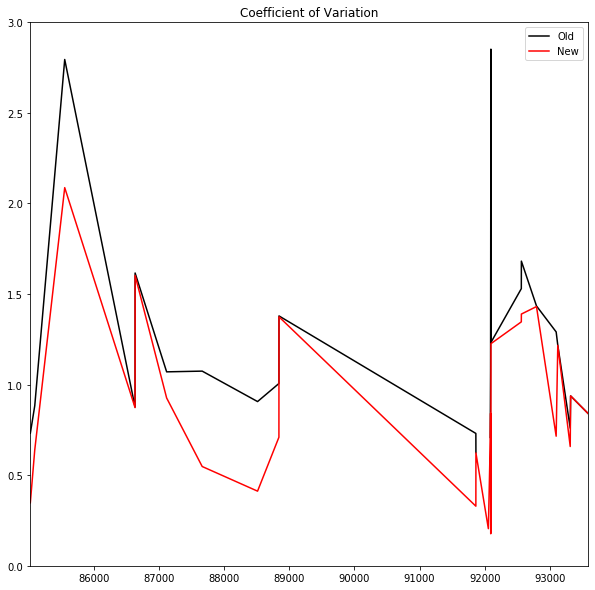

In [54]:
plt.figure(figsize= [10,10])
plt.plot(var_df.loc[var_df['Supply Site Code']=='PL-1505']['SKU'],var_df.loc[var_df['Supply Site Code']=='PL-1505']['Coefficient of Variation of Current CS/ROP'], c ='black')
plt.plot(var_df.loc[var_df['Supply Site Code']=='PL-1505']['SKU'],var_df.loc[var_df['Supply Site Code']=='PL-1505']['Coefficient of Variation of New CS/ROP'],c='red')
plt.xlim(85021,93589)
plt.ylim(0,3)
plt.title("Coefficient of Variation")
plt.legend(['Old','New'])
plt.show()

The coefficient of variation is a measure of how dispersed the data is from the mean value and is a useful statistic while comparing the degree of variation between one data series and another.

Here we take the site PL-1505 and all its products as an example to see how well we were able to balance the grid. In the graph, the blue line shows the 'previous coefficient of variation' and the red line represents the 'new coefficient of variation'. The red line seems to consistently be below the blue one and in some case there is a huge difference.

# Extracting the Dataframes into Excel Sheets

In [34]:
new_data.to_excel(r'./Output/Final Data.xlsx', index=False)

In [35]:
amount_to_deploy.to_excel(r'./Output/Amount to Deploy.xlsx', index=False)